In [ ]:
## importing libraries and modules ##

import pandas
import numpy as np
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer

import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [ ]:
## Checking out the data set for training the model ##

df = pandas.read_csv('tweets_covid.csv')
print(df)

       Unnamed: 0                                            message  label
0             106  just had a real good moment. i missssssssss hi...      0
1             217         is reading manga  http://plurk.com/p/mzp1e      0
2             220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3             288  @lapcat Need to send 'em to my accountant tomo...      0
4             540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...           ...                                                ...    ...
10309      802309  No Depression by G Herbo is my mood from now o...      1
10310      802310  What do you do when depression succumbs the br...      1
10311      802311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312      802312  dont mistake a bad day with depression! everyo...      1
10313      802313                                                  0      1

[10314 rows x 3 columns]


In [ ]:
## Making labels array ##

labels = []


for label in df['label']:
  labels.append(label)

print(labels)

## Making corresponding text array ##

temp1 = []

for msg in df['message']:
  temp1.append(msg)

print(temp1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
### Removing stopwords and punctuations ###

stop_words = set(stopwords.words('english')) 

text = []

for i, msg in enumerate(temp1):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    text.append(listToString(filtered_sentence))
    
    

print(text)

['real good moment missssssssss much', 'reading manga http plurk com p mzp1e', 'comeagainjen http twitpic com 2y2lx http www youtube com watch v zoGfqvh2ME8', 'lapcat Need send em accountant tomorrow Oddly I even referring taxes Those supporting evidence though', 'ADD ME ON MYSPACE myspace com LookThunder', 'sleepy good times tonight though', 'SilkCharm nbn someone already said fiber home mean least regular', '23 24ï ½C possible today Nice', 'nite twitterville workout ciao', 'daNanner Night darlin Sweet dreams', 'Good morning everybody', 'Finally I created WordPress Blog There already blog Seattle Coffee Community http tinyurl com c5uufd', 'kisha cnt get u til get frm u remember ur top', 'nicolerichie Yes remember band It Awesome Will please reply', 'I really love reflections shadows', 'blueaero ooo fantasy like fantasy novels check', 'rokchic28 probs I sell nothing blog http snedwan com I get listen band iTunes', 'shipovalov quot NOKLA connecting people quot', 'Once stayed late start 

In [ ]:
## defining some variables ##

maxlen = 100
training_samples = 1400
validation_samples = 150
test_samples = 450
max_words = 10000

In [ ]:
## Just putting in the code for the tokenizer ##

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


### Padding the data to make of the same length ###
data = pad_sequences(sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 22686 unique tokens.
Shape of data tensor: (10314, 100)
Shape of label tensor: (10314,)


In [ ]:
## this is for shuffling the data


indices = np.arange(data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices)

data = data[indices]

labels = labels[indices]

In [ ]:
## splitting into train and validate directories

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [ ]:

## defining a model ##

model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_12 (Flatten)        (None, 10000)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                320032    
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%cd "/content/drive/MyDrive/dataset/"

/content/drive/MyDrive/dataset


Epoch 1/10
22/22 [==============================] - 1s 30ms/step - loss: 0.6155 - acc: 0.7236 - val_loss: 0.5237 - val_acc: 0.8000
Epoch 2/10
22/22 [==============================] - 0s 21ms/step - loss: 0.5366 - acc: 0.7536 - val_loss: 0.4743 - val_acc: 0.8000
Epoch 3/10
22/22 [==============================] - 0s 21ms/step - loss: 0.5153 - acc: 0.7536 - val_loss: 0.4617 - val_acc: 0.8000
Epoch 4/10
22/22 [==============================] - 0s 21ms/step - loss: 0.4982 - acc: 0.7536 - val_loss: 0.4435 - val_acc: 0.8000
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4786 - acc: 0.7714 - val_loss: 0.4292 - val_acc: 0.8267
Epoch 6/10
22/22 [==============================] - 0s 20ms/step - loss: 0.4578 - acc: 0.8057 - val_loss: 0.4080 - val_acc: 0.8400
Epoch 7/10
22/22 [==============================] - 0s 21ms/step - loss: 0.4391 - acc: 0.8229 - val_loss: 0.4020 - val_acc: 0.8533
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4213 - a

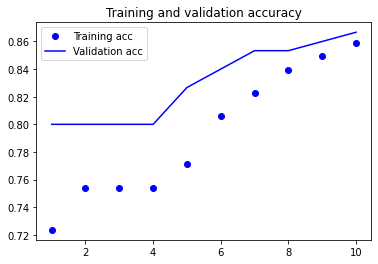

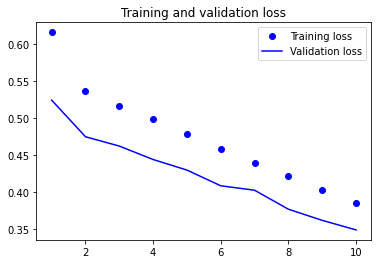

In [ ]:
## training the model ##

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



## Plotting the results ##

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
 ### testing the model ##

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

274/274 [==============================] - 1s 3ms/step - loss: 0.3830 - acc: 0.8616


[0.3830089867115021, 0.8615928888320923]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

Accuracy : 0.9080328617069832


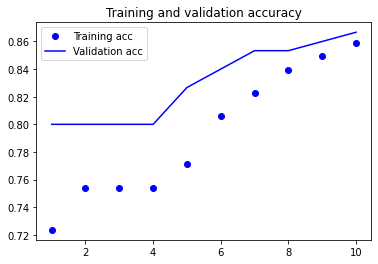

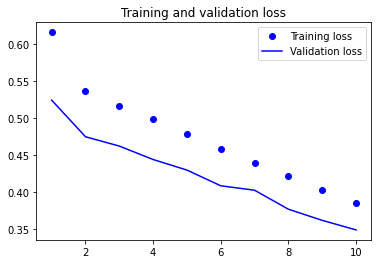

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

model = abc.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
